# Corporate Governance - Compilation of Models

## Informationsasymmetrien

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [1]:
agents = {
    "A": {
      "Bruttonutzen": 400,
      "Mindestverguetung": 350
      },
    "B": {
      "Bruttonutzen": 200,
      "Mindestverguetung": 200
      }
  }

In [106]:
def total_information(agents):
  selection = None
  for agent in agents.keys():
    tmp = agents[agent]["Bruttonutzen"] - agents[agent]["Mindestverguetung"]
    print(f"""Netto Nutzen Prinzipal bei Beauftragung von Agent {agent}: {tmp}""")
    if selection is None:
      selection = agent
    elif tmp > agents[selection]["Bruttonutzen"] - agents[selection]["Mindestverguetung"]:
      selection = agent
  print(f"Auswahl des Prinzipals: Agent {selection}")


total_information(agents)

Netto Nutzen Prinzipal bei Beauftragung von Agent B: 0
Auswahl des Prinzipals: Agent B


In [79]:
def zahlungsbereitschaft(agents):
  tmp = 0
  for agent in (agents.keys()):
    tmp += agents[agent]["Bruttonutzen"]
  return (tmp / len(agents))
  
  
def hidden_information(agents):
    while len(agents) > 0:
      zb = zahlungsbereitschaft(agents)
      for agent in agents.keys():
        if zb < agents[agent]["Mindestverguetung"]:
          print(f"Agent {agent} wird vom Markt verdrängt")
          agents.pop(agent)
          return hidden_information(agents)
        else:
            print(f"Agent {agent} ist der letzte verbleibende Agent am Markt!")
            return

hidden_information(agents)

Agent B ist der letzte verbleibende Agent am Markt!


## Preference-based CSR Activities

In [68]:
# 2 alternative projects to pick
clean = {
    "payout": 200,
    "damage": 0    # outside damage, doesnt affect shareholders

}

dirty = {
    "payout": 250,
    "damage": 100
}


# shareholder preferences (median shareholder)
social_pref = (0.0 + 0.6 + 0.9) / 3
economic_pref = (1 - social_pref)

# step 1: compute wellfare for both projects

def calc_wohlfahrt(profit, damage):
    return profit - damage

def analyze (project):
    wf = calc_wohlfahrt(project["payout"], project["damage"])
    print(
        f"""Shareholder Profit: {project["payout"]}\tCommunity Damage: {project["damage"]}\tWohlfahrt: {wf}"""
    )

print("Clean Project:")
analyze(clean)

print("\nDirty Project:")
analyze(dirty)

Clean Project:
Shareholder Profit: 200	Community Damage: 0	Wohlfahrt: 200

Dirty Project:
Shareholder Profit: 250	Community Damage: 100	Wohlfahrt: 150


In [83]:
social_preferences = np.linspace(0.0, 1.0, 1000)
economic_preferences = np.array([
    (1 - social_pref) for social_pref in social_preferences 
])


def shareholder_utility(social_pref, economic_pref, project):
    return (
        social_pref * calc_wohlfahrt(project["payout"], project["damage"]) +
        economic_pref * project["payout"]
    )

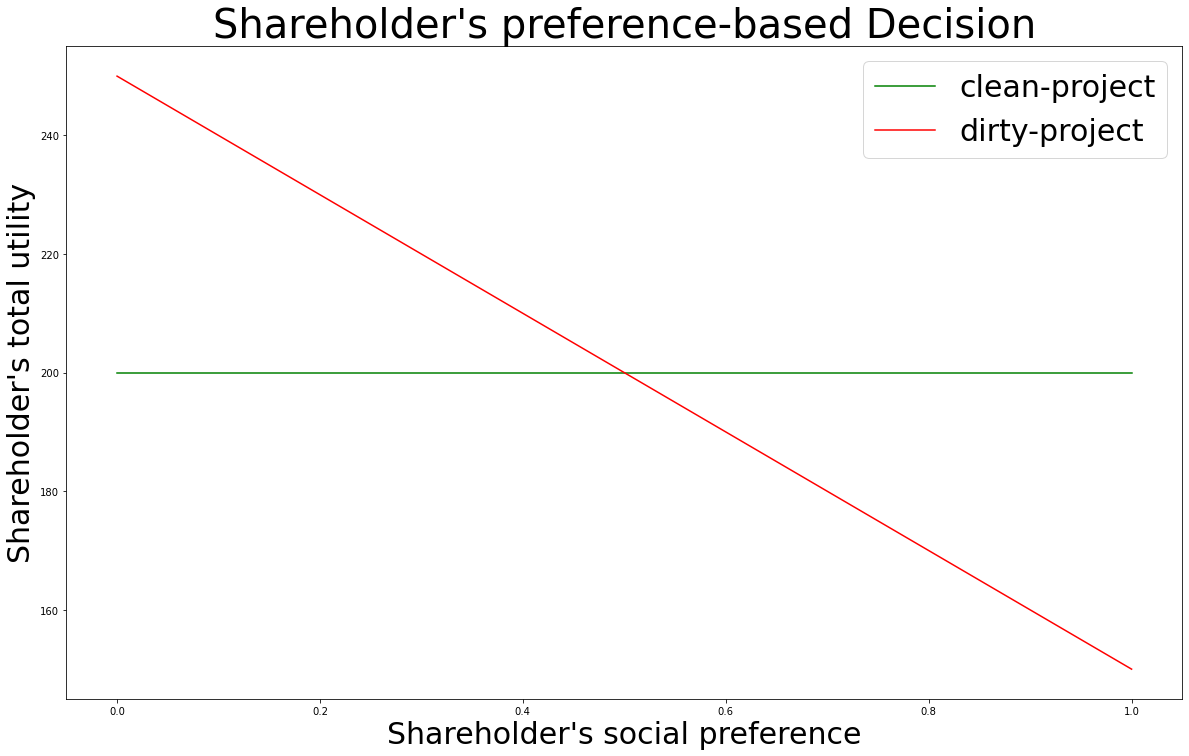

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(20,12)

ax.plot(social_preferences, shareholder_utility(social_preferences, economic_preferences, clean), label="clean-project", color="green")
ax.plot(social_preferences, shareholder_utility(social_preferences, economic_preferences, dirty), label="dirty-project", color="red")
    
ax.set_title("Shareholder's preference-based Decision", size=40)
ax.set_xlabel("Shareholder's social preference", size=30)
ax.set_ylabel("Shareholder's total utility", size=30)
ax.legend(fontsize=30)

## Anreizstärke der Vorstandsvergütung

### Relative Anreizstärke / pay-performance sensitivity

Wie stark profitiert Vorstand von einer Unternehmenswertsteigerung von 1 GE?

Text(0.5, 1.0, 'Pay Performance Sensitivity for 10.000 Total Stocks issued')

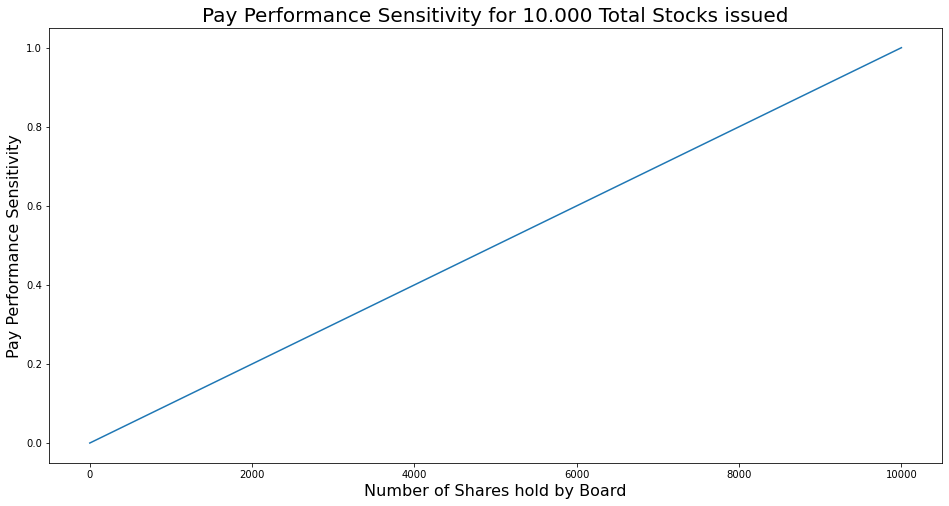

In [99]:
def pay_performance_sensitivity(owned_num_shares, total_num_shares):
    return (owned_num_shares / total_num_shares)

total_num_shares = 10_000
X = np.linspace(0, 10_000, 10_000)

fig, ax = plt.subplots()
ax.plot(X, pay_performance_sensitivity(X, total_num_shares))

fig.set_size_inches(16,8)
ax.set_xlabel("Number of Shares hold by Board", size=16)
ax.set_ylabel("Pay Performance Sensitivity", size=16)
ax.set_title("Pay Performance Sensitivity for 10.000 Total Stocks issued", size=20)

## Absolute Anreizstärke / Equity at Stake

Wie verändert sich das Vermögen des Vorstands bei einer Kurssteigerung um 1%?

In [101]:
def equity_at_stake_exante(owned_num_shares, stock_price):
    return owned_num_shares * stock_price * .01

def equity_at_stake_expost(delta_board_val, delta_stockprice_percentage):
    return delta_board_val / delta_stockprice_percentage

> Ein Vorstand besitzt 100 000 gesperrte Aktien. Der Aktienkurs beträgt 80 Euro. Die Gesellschaft hat insgesamt 100 Mio. Aktien ausgegeben.
Wie hoch ist die relative und absolute Anreizstärke?

In [105]:
owned_num_shares = 100_000
total_num_shares = 100_000_000
stock_price = 80

print(
    "Relative Anreizstärke == ",
    pay_performance_sensitivity(owned_num_shares, total_num_shares)
)


print(
    "Absolute Anreizstärke == ",
    owned_num_shares * 80 * 0.01

)

Relative Anreizstärke ==  0.001
Absolute Anreizstärke ==  80000.0
